# FINAL EDA - 13_epo

## 0. Previos

Se cargan las bases y las librerías a utilizar.

In [1]:
# Librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np

#import generic_funcions as gf
#import adherence_functions as af
import warnings
warnings.filterwarnings('ignore')

ruta_archivos = 'C:/Users/Usuario/Documents/EDA_Omnivida/'

## 1. Módulo de Interés

In [2]:
modulo = 'epo' # Este equivale al 'prefi' del diccionario. El diccionario está en: 1_data_transformation/generic_functions.py
ad_marca = 'adeherencia_0'
ids = ['id','year','month',ad_marca]

#### t-test
* `ant_j_sum_12`: suma del número de antecedentes de caracter respiratorio en los últimos doce meses.

#### Árbol de Decisión
* Ninguna

## 2. Carga de Datos

In [4]:
base = pd.read_csv( ruta_archivos + 'base_adeherencia_features_0.csv')
base.head()

,id,year,month,adeherencia_0,key,far_rea_asma_sum_6,far_rea_total_sum_6,far_evo_aun_sum_6,far_cau_def_sum_6,far_cau_otra_sum_6,...,hab_alcohol_avg_12,hab_cigarrillo_avg_12,hab_ejercicio_avg_12,inc_con_sum_6,inc_inc_sum_6,inc_con_sum_12,inc_inc_sum_12,imc_avg_6,imc_avg_12,imc_foto
0,500547,2016,7,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,3.0,0.0,3.0,NaN,NaN,NaN
1,500547,2019,3,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,500547,2019,10,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.8,NaN
3,500547,2019,12,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.8,NaN
4,500547,2020,1,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.8,NaN


In [5]:
variables = [i for i in base.columns if i.startswith( modulo + '_')]
df = base[ids + variables]
df.head()

,id,year,month,adeherencia_0,epo_1_sum_6,epo_2_sum_6,epo_3_sum_6,epo_4_sum_6,epo_total_sum_6,epo_1_sum_12,epo_2_sum_12,epo_3_sum_12,epo_4_sum_12,epo_total_sum_12
0,500547,2016,7,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,500547,2019,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,500547,2019,10,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,500547,2019,12,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,500547,2020,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(3663, 14)

## 3. Análisis
### 3.1. Completitud

In [8]:
# Se calcula el número de nulls por fila, y se descartan los registros con todo en null
df['nulls'] = df.isnull().sum(axis = 1)
todo_null = df.shape[1] - 5    #id, month, year, nuls, adeherencia_0
df = df[df['nulls'] < todo_null ].copy()
print("La base se reduce a "+ str(df.shape[0]) + " de " + str(base.shape[0]) +
      " registros. Que corresponde a un " + str(round(df.shape[0]/base.shape[0]*100, 2)) + "%.")
df.head()

La base se reduce a 302 de 3663 registros. Que corresponde a un 8.24%.


,id,year,month,adeherencia_0,epo_1_sum_6,epo_2_sum_6,epo_3_sum_6,epo_4_sum_6,epo_total_sum_6,epo_1_sum_12,epo_2_sum_12,epo_3_sum_12,epo_4_sum_12,epo_total_sum_12,nulls
39,524006,2016,11,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0
40,524006,2017,1,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0
41,524006,2017,4,1,1.0,0.0,1.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,0
42,524006,2017,5,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0
43,524006,2017,7,1,2.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0,0.0,3.0,0


### 3.2 Análisis Temporal

In [9]:
# se transforma la fecha para ser de tipo datetime
df['day'] = 1
df['fecha'] = pd.to_datetime(df[['year','month','day']])
df['fecha'] = df['fecha'].apply(lambda x: x.strftime('%Y%m'))

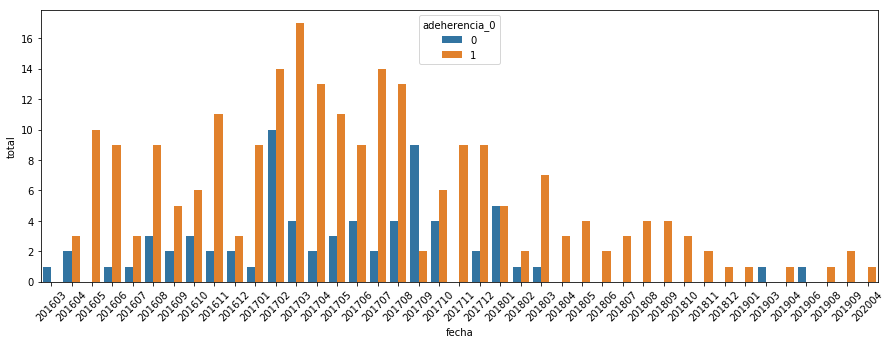

In [10]:
df_g = df.groupby(['fecha','adeherencia_0'])['id'].count().reset_index(name='total')

fig, ax = plt.subplots(figsize=(15, 5))
ax = sns.barplot(x="fecha", y="total", hue="adeherencia_0", data=df_g)
_ = ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

Se encuentran registros a lo largo de toda la historia. Desde 201603 hasta 202005. Hay un pico de no-adherencia en 201712. 

### 3.3 Correlaciones

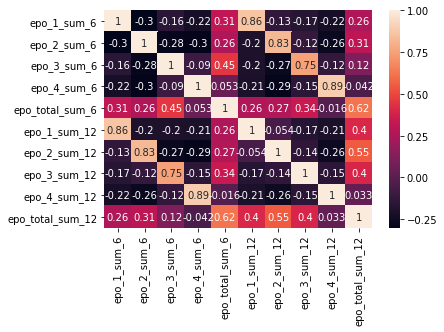

In [11]:
corrMatrix = df[variables].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

XXXX

### 3.4 Dispersión

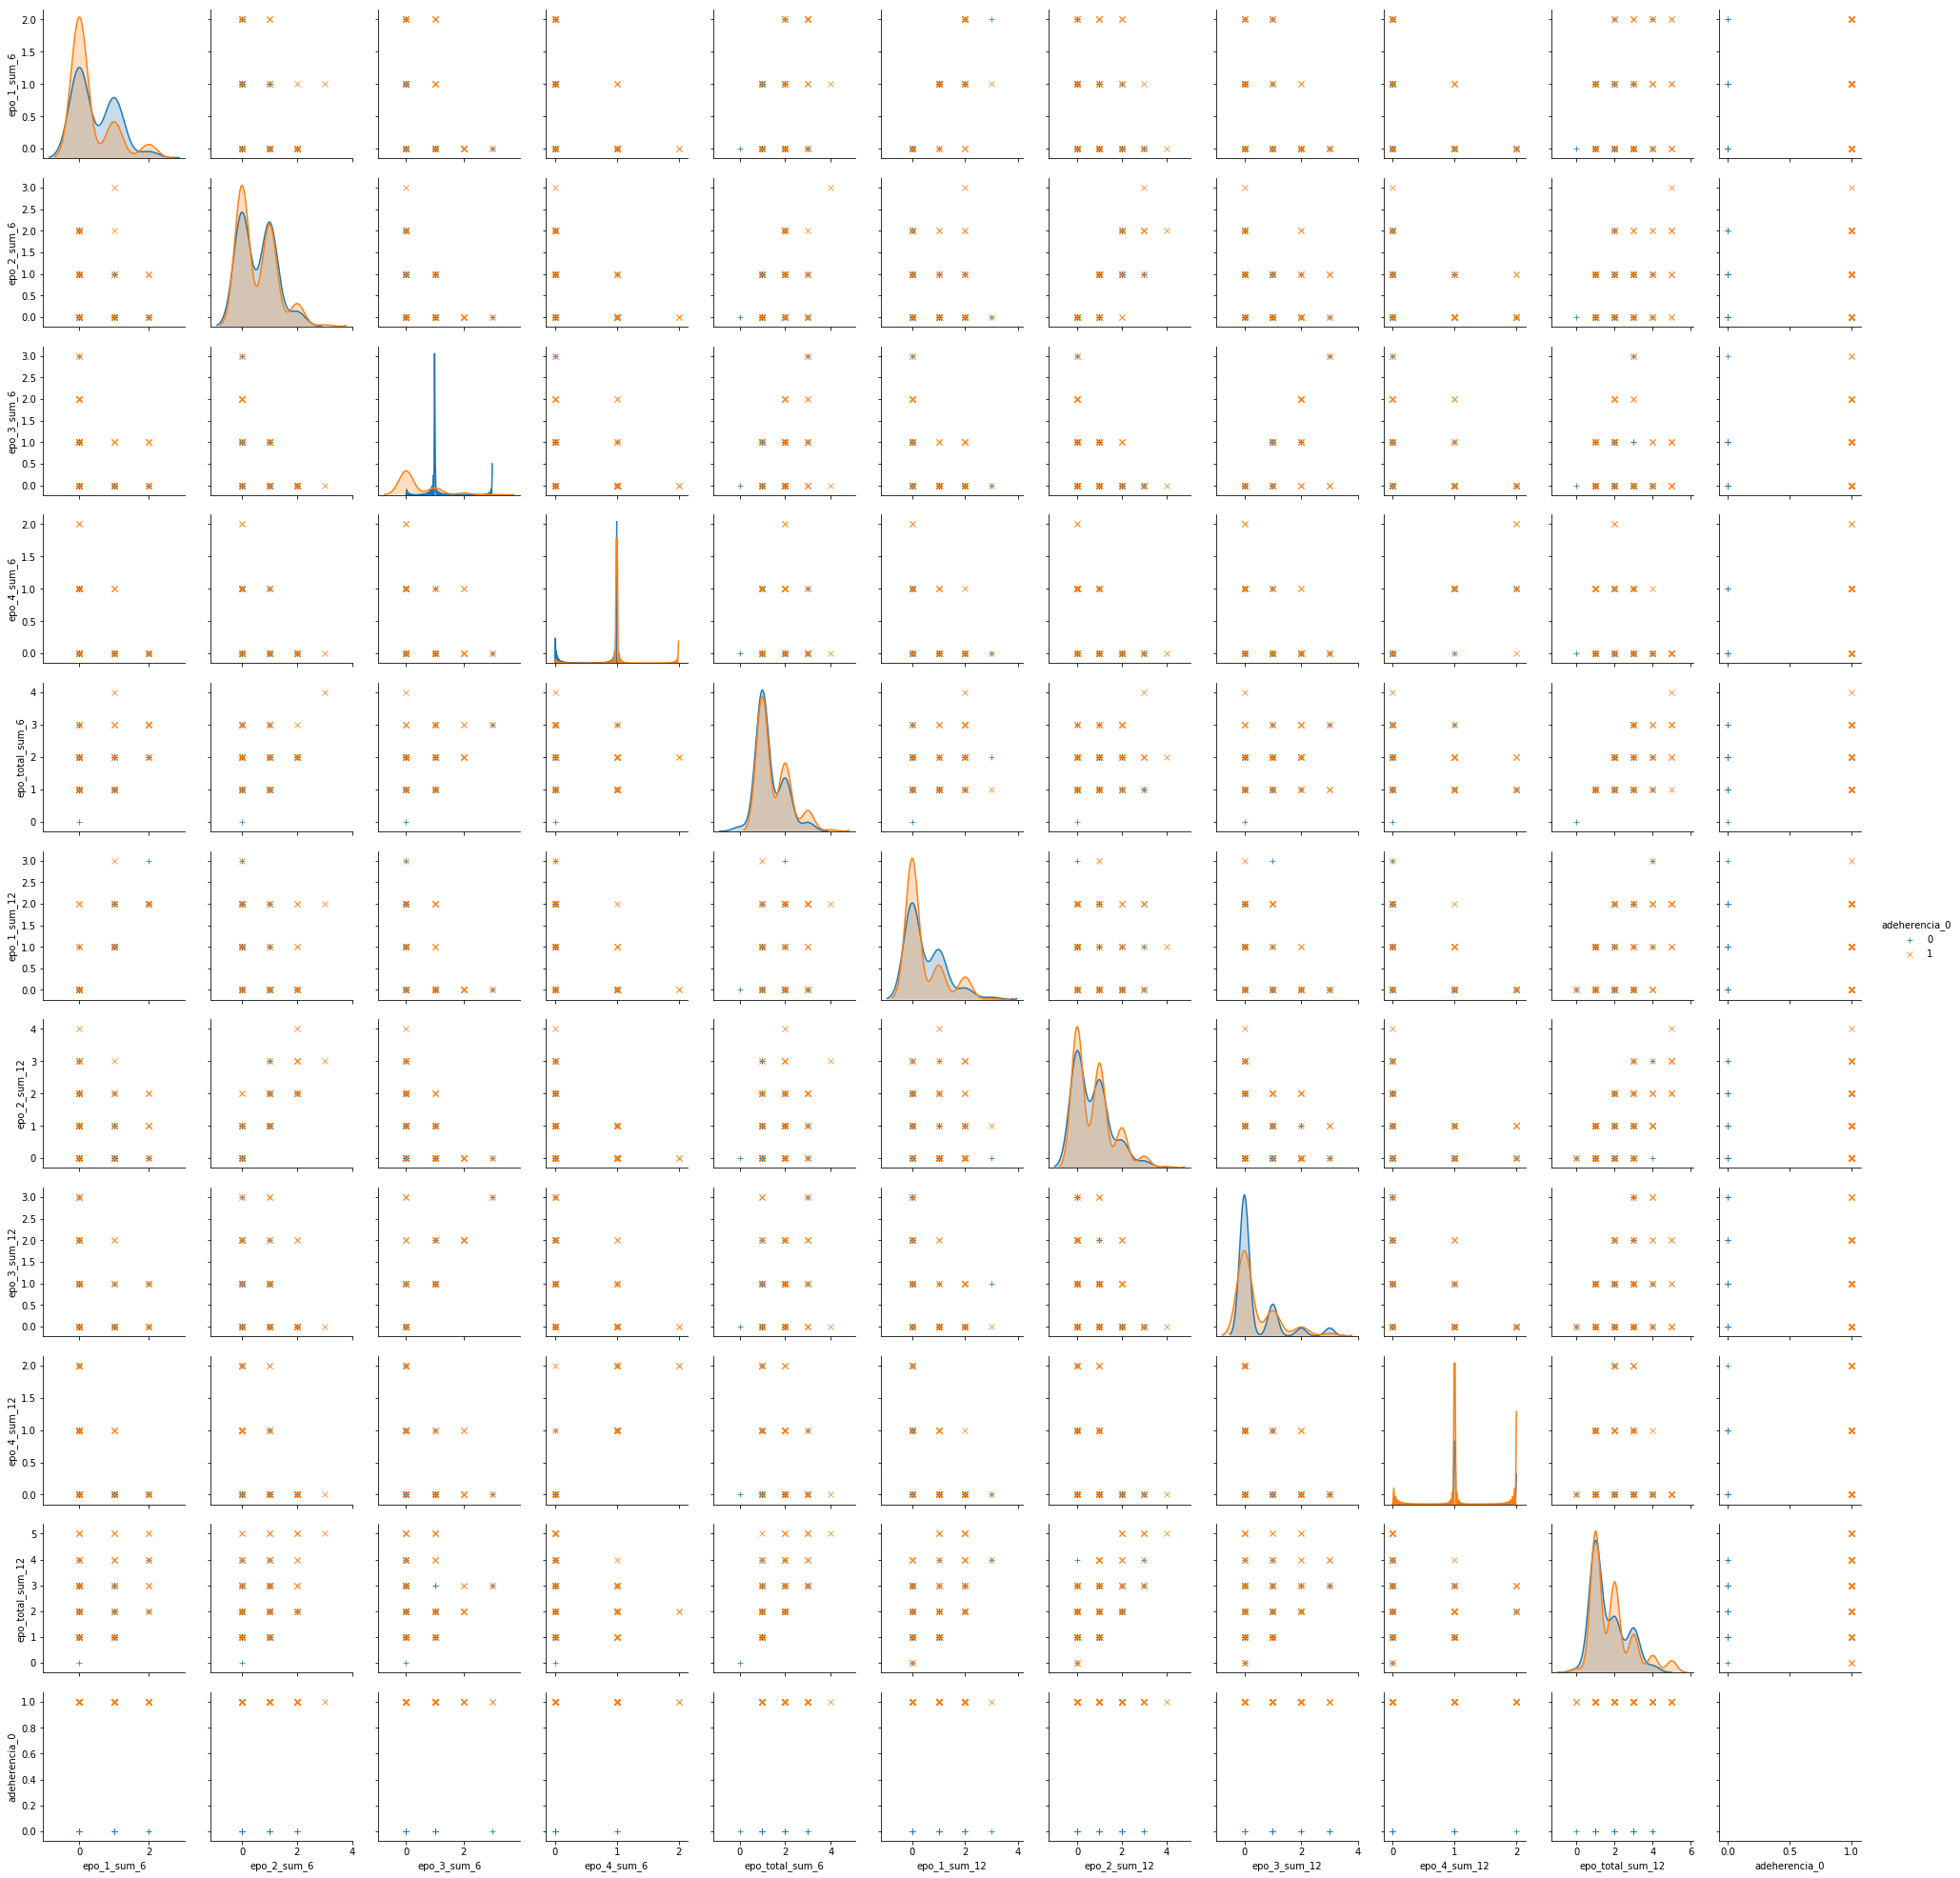

In [12]:
g = sns.pairplot(df[variables + ['adeherencia_0']], hue="adeherencia_0", markers=["+", "x"])

### 3.5 Boxplot Temporal

Dado que sólo una variable fue rescatada por el análisis y no se ve mayor diferencia con las demás variables. Se revisar el boxplot para la variable seleccionada.

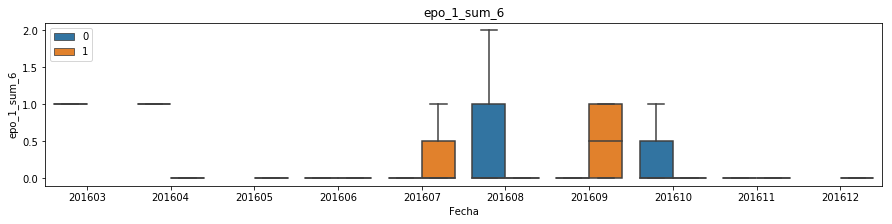

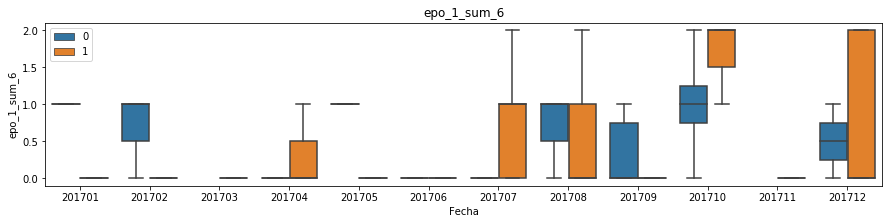

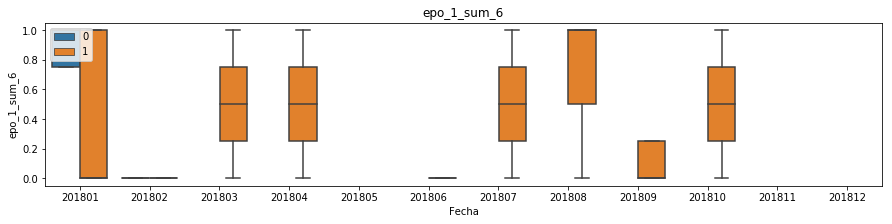

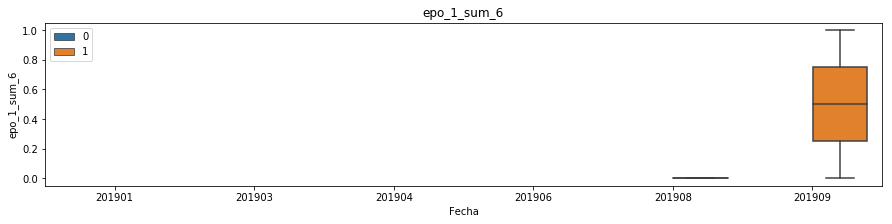

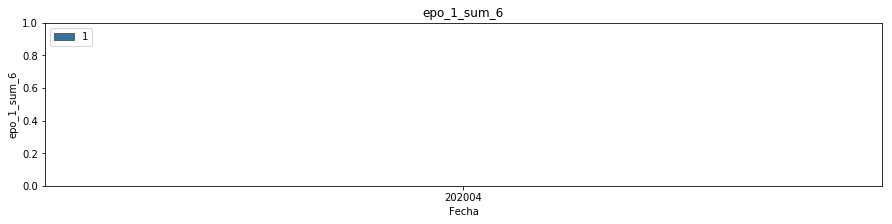

In [13]:
years = [2016,2017,2018,2019,2020]

for y in years :
    fig, ax = plt.subplots(figsize=(15, 3))
    m = sns.boxplot(
        x="fecha",
        y="epo_1_sum_6",
        hue="adeherencia_0",
        data=df[df['year']==y],
        orient="vertical",
        showfliers=False,
    )

    # Format plot
    plt.legend(loc="upper left")
    plt.title("epo_1_sum_6")
    #plt.xticks(rotation=45)
    plt.xlabel("Fecha")
    _ = plt.ylabel("epo_1_sum_6")

No se evidencia algún patrón diferenciado por adherencia de la variable en el tiempo. Normalmente la variable está entre los valores de 0 y 2 (aunque hay outliers en 3).

In [14]:
df.describe()

,id,year,month,adeherencia_0,epo_1_sum_6,epo_2_sum_6,epo_3_sum_6,epo_4_sum_6,epo_total_sum_6,epo_1_sum_12,epo_2_sum_12,epo_3_sum_12,epo_4_sum_12,epo_total_sum_12,nulls,day
count,3.020000e+02,302.000000,302.000000,302.000000,199.000000,199.000000,199.000000,199.000000,199.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.0
mean,1.264187e+06,2016.960265,6.294702,0.764901,0.366834,0.572864,0.326633,0.195980,1.462312,0.430464,0.735099,0.410596,0.238411,1.814570,1.705298,1.0
std,3.748055e+05,0.727995,3.299437,0.424765,0.603948,0.661699,0.626715,0.422575,0.672202,0.701303,0.844777,0.731553,0.505236,1.055937,2.374261,0.0
min,5.240060e+05,2016.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,9.742810e+05,2016.250000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0
50%,1.366597e+06,2017.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.500000,0.000000,1.0
75%,1.536265e+06,2017.000000,9.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,2.000000,5.000000,1.0
max,1.998401e+06,2020.000000,12.000000,1.000000,2.000000,3.000000,3.000000,2.000000,4.000000,3.000000,4.000000,3.000000,2.000000,5.000000,5.000000,1.0


### 3.6 Análisis por Paciente

In [15]:
df_gi = df.groupby('id')['year'].count().reset_index(name = 'cuenta')

print("Estas variables están presentes para " + str(df_gi.shape[0]) + " pacientes únicos. Los pacientes más frecuentes en el tiempo son:")

df_gi.sort_values('cuenta', ascending = False).head(10)

Estas variables están presentes para 47 pacientes únicos. Los pacientes más frecuentes en el tiempo son:


,id,cuenta
8,916510,21
18,1196034,17
32,1463545,15
45,1828862,15
29,1437443,15
9,974281,13
44,1764814,13
28,1427481,12
35,1536265,11
1,622031,11


El siguiente conteo revisa de forma independiente los conteos por marca de adherencia.

In [16]:
df_gi = df.groupby(['id','adeherencia_0'])['year'].count().reset_index(name = 'cuenta')

df_gip = df_gi.pivot("id", "adeherencia_0", "cuenta").reset_index()
df_gip.fillna(0, inplace = True )
df_gip['total'] = df_gip[0] + df_gip[1]
df_gip.sort_values('total', ascending = False).head(15)

adeherencia_0,id,0,1,total
8,916510,8.0,13.0,21.0
18,1196034,2.0,15.0,17.0
32,1463545,3.0,12.0,15.0
45,1828862,8.0,7.0,15.0
29,1437443,0.0,15.0,15.0
9,974281,2.0,11.0,13.0
44,1764814,2.0,11.0,13.0
28,1427481,1.0,11.0,12.0
35,1536265,1.0,10.0,11.0
1,622031,5.0,6.0,11.0
